## [OpenCV Shape Recognition](https://www.youtube.com/watch?v=ES2KBnE-Be8)

In [1]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

class shapeRecognition():
    
    def __init__(self, img):
        self.img = img
        
    def preProcessing(self):
        lower = np.array([0,0,0], dtype = np.uint8)
        upper = np.array([15,15,15], dtype = np.uint8)
        mask = cv2.inRange(self.img, lower, upper)
        plt.imshow(mask, cmap='gray')
        plt.show()
        
        
        (flags, contours, h) = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        return contours

In [2]:
img = cv2.imread('geo-shapes-650x1024.png')
shr = shapeRecognition(img)

In [3]:
# cv2.imshow("IMAGE", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

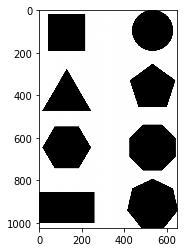

In [4]:
plt.imshow(img[:, :, ::-1])
plt.show()

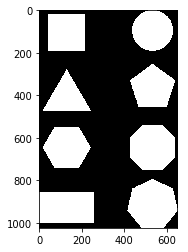

In [5]:
contours = shr.preProcessing()

In [6]:
contours[1][:5]

array([[[529, 793]],

       [[527, 795]],

       [[525, 795]],

       [[524, 796]],

       [[523, 796]]], dtype=int32)

## [Simple shape detection](https://www.youtube.com/watch?v=43pCXboZ5hE)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
img = cv2.imread('primary-shapes.jpg', cv2.IMREAD_GRAYSCALE)

In [6]:
img.shape

(150, 480)

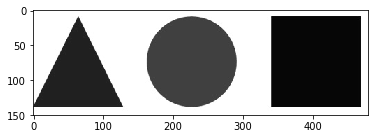

In [7]:
plt.imshow(img, cmap='gray')
plt.show()

In [8]:
_, threshold = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)

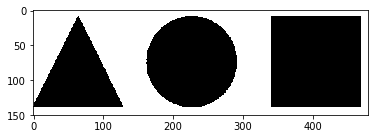

In [9]:
plt.imshow(threshold, cmap='gray')
plt.show()

In [10]:
(_, contours, _) = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

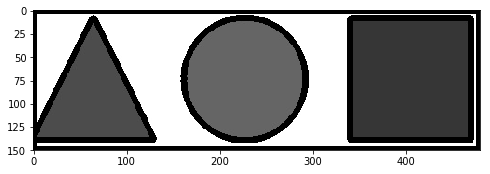

In [11]:
for cnt in contours:
    cv2.drawContours(img, [cnt], 0 ,(0),5)
plt.figure(figsize=(8, 12))
plt.imshow(img, cmap='gray')

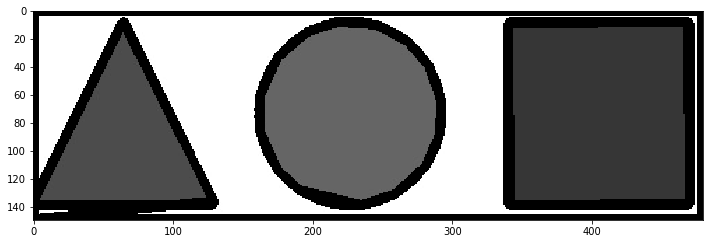

In [12]:
font = cv2.FONT_HERSHEY_COMPLEX
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt,True), True)
    cv2.drawContours(img, [approx], 0 ,(0),5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x,y), font, 1, (0))
        
#     elif len(approx) == 4:
#          cv2.putText(img, "Rectangle", (x,y), font, 1, (0))

    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x,y), font, 1, (0))
        
#     elif len(approx) == 4:
#         cv2.putText(img, "Rectangle", (x,y), font, 1, (0))
        
plt.figure(figsize=(12, 15))
plt.imshow(img, cmap='gray')

In [12]:
approx[0][0]

array([851, 140], dtype=int32)